In [1]:
import pandas as pd
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'Customer_satisfaction.csv'
data = pd.read_csv(file_path)

# Display the first few rows to understand the structure
data.head()


,Age,Income,Loyalty_Years,Satisfaction
0,56,22695,8,3
1,46,68190,5,4
2,32,25258,4,1
3,60,59504,2,5
4,25,53159,6,5


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            100 non-null    int64
 1   Income         100 non-null    int64
 2   Loyalty_Years  100 non-null    int64
 3   Satisfaction   100 non-null    int64
dtypes: int64(4)
memory usage: 3.2 KB


In [3]:
data.isnull()

,Age,Income,Loyalty_Years,Satisfaction
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
95,False,False,False,False
96,False,False,False,False
97,False,False,False,False
98,False,False,False,False


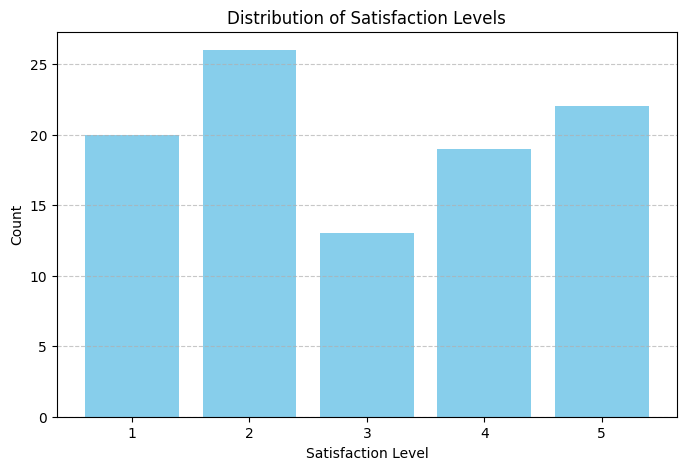

In [4]:
# Count the frequency of each Satisfaction level
satisfaction_counts = data['Satisfaction'].value_counts().sort_index()

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(satisfaction_counts.index, satisfaction_counts.values, color='skyblue')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.title('Distribution of Satisfaction Levels')
plt.xticks(satisfaction_counts.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

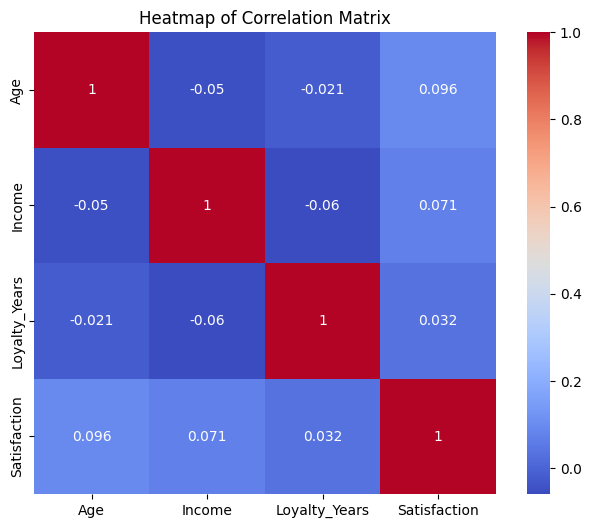

In [5]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, square=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()


In [6]:
data['Satisfaction_Binary'] = data['Satisfaction'].apply(lambda x: 1 if x in [1, 2, 3] else 0)

# Display the first few rows to verify the change
print(data.head())

   Age  Income  Loyalty_Years  Satisfaction  Satisfaction_Binary
0   56   22695              8             3                    1
1   46   68190              5             4                    0
2   32   25258              4             1                    1
3   60   59504              2             5                    0
4   25   53159              6             5                    0


In [7]:
data

,Age,Income,Loyalty_Years,Satisfaction,Satisfaction_Binary
0,56,22695,8,3,1
1,46,68190,5,4,0
2,32,25258,4,1,1
3,60,59504,2,5,0
4,25,53159,6,5,0
...,...,...,...,...,...
95,24,90467,3,5,0
96,26,72662,1,1,1
97,41,32688,1,5,0
98,18,45342,5,5,0


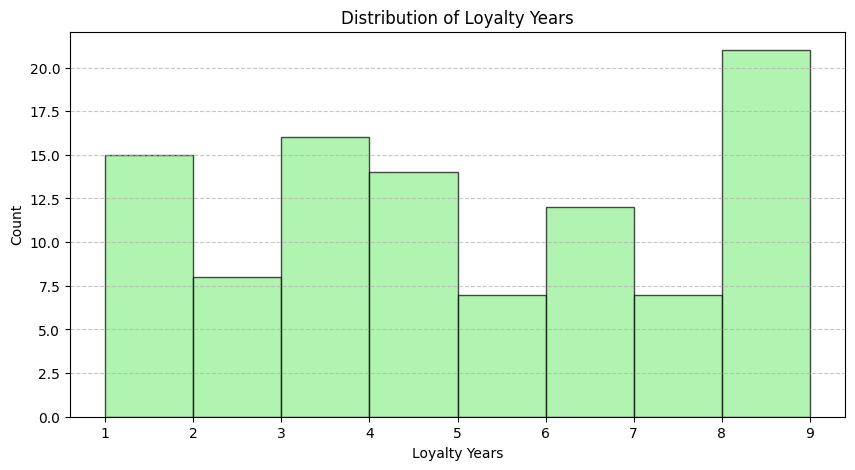

In [8]:
# Plotting a bar chart for Loyalty_Years distribution
plt.figure(figsize=(10, 5))
plt.hist(data['Loyalty_Years'], bins=range(data['Loyalty_Years'].min(), data['Loyalty_Years'].max() + 1), color='lightgreen', alpha=0.7, edgecolor='black')
plt.xlabel('Loyalty Years')
plt.ylabel('Count')
plt.title('Distribution of Loyalty Years')
plt.xticks(range(data['Loyalty_Years'].min(), data['Loyalty_Years'].max() + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


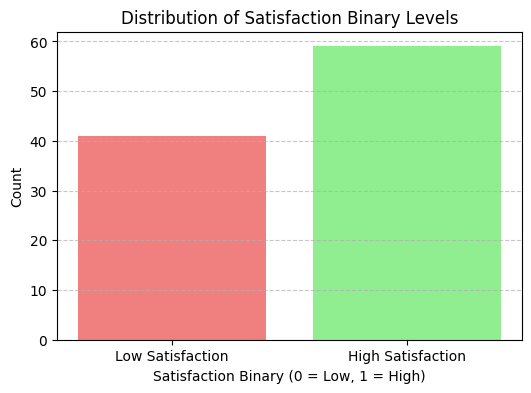

In [9]:
# Count the frequency of each Satisfaction_Binary value
binary_counts = data['Satisfaction_Binary'].value_counts()

# Create a bar chart
plt.figure(figsize=(6, 4))
plt.bar(binary_counts.index, binary_counts.values, color=['lightgreen', 'lightcoral'])
plt.xlabel('Satisfaction Binary (0 = Low, 1 = High)')
plt.ylabel('Count')
plt.title('Distribution of Satisfaction Binary Levels')
plt.xticks([0, 1], ['Low Satisfaction', 'High Satisfaction'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


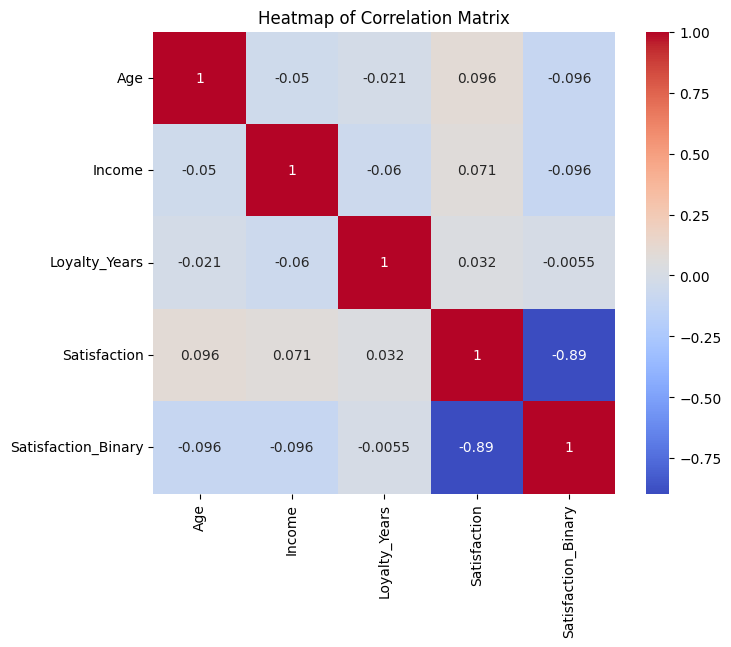

In [10]:
import seaborn as sns

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, square=True)
plt.title('Heatmap of Correlation Matrix')
plt.show()


# **Model 1 with MCMC Sampling = 50**

In [11]:
with pm.Model() as satisfaction_model:
    # Define priors for the coefficients
    beta_age = pm.Normal('beta_age', mu=0, sigma=10)
    beta_income = pm.Normal('beta_income', mu=0, sigma=10)
    beta_loyalty_years = pm.Normal('beta_loyalty_years', mu=0, sigma=10)
    intercept = pm.Normal('intercept', mu=0, sigma=10)

    # Define the linear predictor
    eta = (
        intercept
        + beta_age * data['Age']
        + beta_income * data['Income']
        + beta_loyalty_years * data['Loyalty_Years']
    )

    # Define logistic transformation to get probabilities
    p = pm.Deterministic('p', 1 / (1 + pm.math.exp(-eta)))

    # Define likelihood
    likelihood = pm.Bernoulli('likelihood', p=p, observed=data['Satisfaction_Binary'])

    # Sample from the posterior distribution
    trace_50 = pm.sample(50, tune=50, return_inferencedata=True)

# Display a summary of the trace
pm.summary(trace_50)

Output()

Output()

ERROR:pymc.stats.convergence:There were 100 divergences after tuning. Increase `target_accept` or reparameterize.
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: divide by zero encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: divide by zero encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/pytho

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_age,-0.037,0.260,-0.296,0.222,0.173,0.142,2.0,2.0,inf
beta_income,0.726,0.025,0.701,0.751,0.017,0.014,2.0,2.0,inf
beta_loyalty_years,0.485,0.202,0.285,0.686,0.134,0.110,2.0,2.0,inf
intercept,-0.064,0.581,-0.642,0.515,0.386,0.318,2.0,2.0,inf
p[0],1.000,0.000,1.000,1.000,0.000,0.000,100.0,100.0,NaN
...,...,...,...,...,...,...,...,...,...
p[95],1.000,0.000,1.000,1.000,0.000,0.000,100.0,100.0,NaN
p[96],1.000,0.000,1.000,1.000,0.000,0.000,100.0,100.0,NaN
p[97],1.000,0.000,1.000,1.000,0.000,0.000,100.0,100.0,NaN
p[98],1.000,0.000,1.000,1.000,0.000,0.000,100.0,100.0,NaN


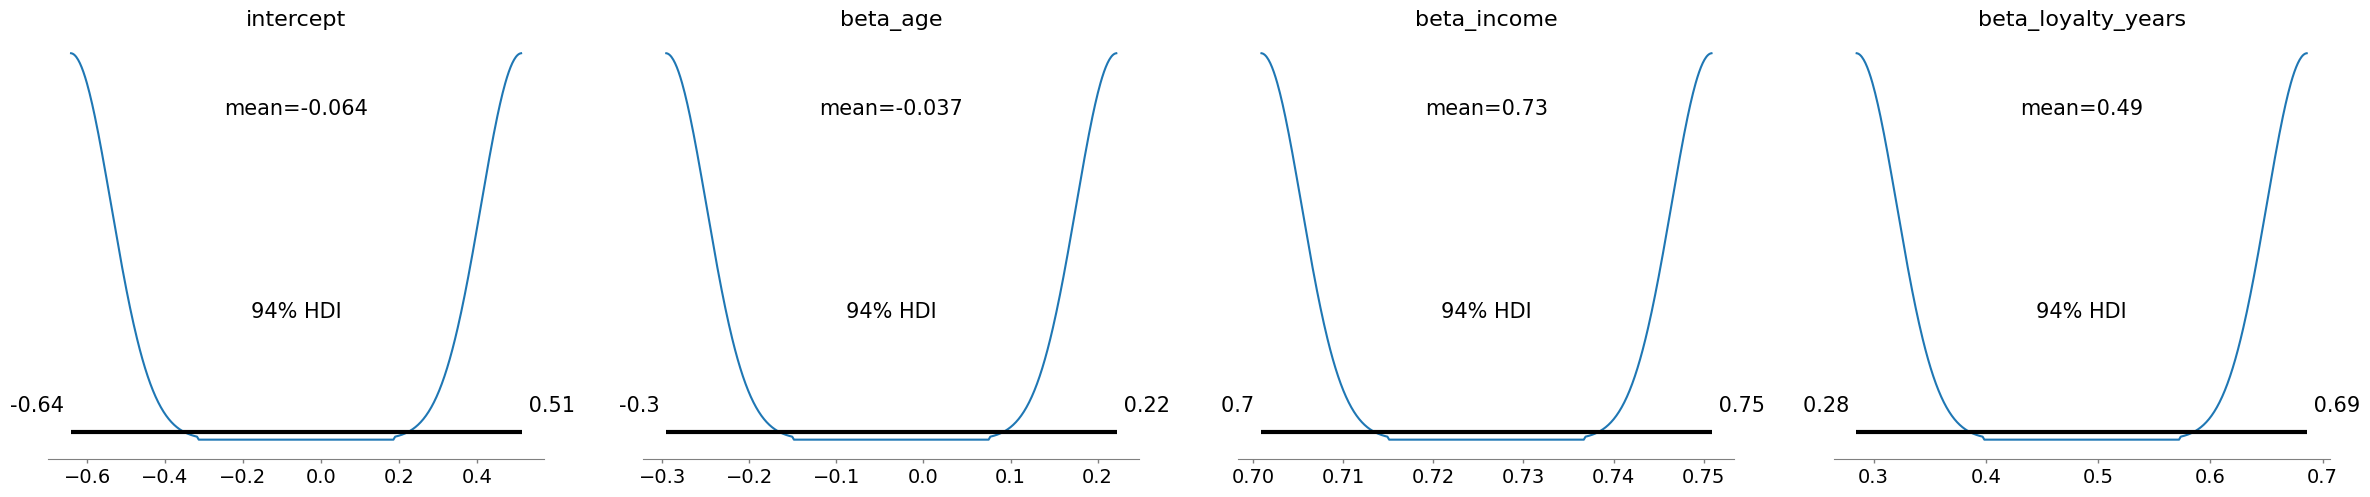

In [12]:
import arviz as az

# Plot posterior distributions
az.plot_posterior(trace_50, var_names=['intercept','beta_age', 'beta_income', 'beta_loyalty_years'])
plt.show()


In [13]:
# Display diagnostics
print(pm.summary(trace_50))

/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: divide by zero encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: divide by zero encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: divide by zero encountered in scalar divide
  

                     mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
beta_age           -0.037  0.260  -0.296    0.222      0.173    0.142   
beta_income         0.726  0.025   0.701    0.751      0.017    0.014   
beta_loyalty_years  0.485  0.202   0.285    0.686      0.134    0.110   
intercept          -0.064  0.581  -0.642    0.515      0.386    0.318   
p[0]                1.000  0.000   1.000    1.000      0.000    0.000   
...                   ...    ...     ...      ...        ...      ...   
p[95]               1.000  0.000   1.000    1.000      0.000    0.000   
p[96]               1.000  0.000   1.000    1.000      0.000    0.000   
p[97]               1.000  0.000   1.000    1.000      0.000    0.000   
p[98]               1.000  0.000   1.000    1.000      0.000    0.000   
p[99]               1.000  0.000   1.000    1.000      0.000    0.000   

                    ess_bulk  ess_tail  r_hat  
beta_age                 2.0       2.0    inf  
beta_income              2.

# **Model 1 Interpretation (Concise):**

# Intercept (Mean: -0.064):
Slightly negative baseline satisfaction level, but high uncertainty (94% HDI includes zero).

#Beta for Age (Mean: -0.037):
Very weak, negative association with satisfaction. Not statistically significant (HDI crosses zero).

#Beta for Income (Mean: 0.73):
Strong positive association with satisfaction. Statistically significant (HDI does not cross zero).

#Beta for Loyalty Years (Mean: 0.49):
Moderate positive association with satisfaction. Statistically significant (HDI does not cross zero).

# **Model 2 with MCMC Sampling = 1000**

In [14]:
with pm.Model() as satisfaction_model_1000:
    # Define priors for the coefficients
    beta_age = pm.Normal('beta_age', mu=0, sigma=10)
    beta_income = pm.Normal('beta_income', mu=0, sigma=10)
    beta_loyalty_years = pm.Normal('beta_loyalty_years', mu=0, sigma=10)
    intercept = pm.Normal('intercept', mu=0, sigma=10)

    # Define the linear predictor
    eta = (
        intercept
        + beta_age * data['Age']
        + beta_income * data['Income']
        + beta_loyalty_years * data['Loyalty_Years']
    )

    # Define logistic transformation to get probabilities
    p = pm.Deterministic('p', 1 / (1 + pm.math.exp(-eta)))

    # Define likelihood
    likelihood = pm.Bernoulli('likelihood', p=p, observed=data['Satisfaction_Binary'])

    # Sample from the posterior distribution
    trace_1000 = pm.sample(1000, tune=500, return_inferencedata=True)

# Displaying a summary of the trace
pm.summary(trace_1000)

Output()

Output()

/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:595: RuntimeWarning: invalid value encountered in sqrt
  rhat_value = np.sqrt(
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
ERROR:pymc.stats.convergence:There were 2000 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:595: RuntimeWarning: invalid value encountered in sqrt
  rhat_value = np.sqrt(
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta_age,0.126,0.239,-0.114,0.365,0.169,0.143,2.0,2.0,NaN
beta_income,0.481,0.277,0.204,0.759,0.195,0.165,2.0,2.0,NaN
beta_loyalty_years,0.112,0.193,-0.081,0.305,0.136,0.115,2.0,2.0,NaN
intercept,-0.120,0.357,-0.476,0.237,0.251,0.213,2.0,2.0,NaN
p[0],1.000,0.000,1.000,1.000,0.000,0.000,2000.0,2000.0,NaN
...,...,...,...,...,...,...,...,...,...
p[95],1.000,0.000,1.000,1.000,0.000,0.000,2000.0,2000.0,NaN
p[96],1.000,0.000,1.000,1.000,0.000,0.000,2000.0,2000.0,NaN
p[97],1.000,0.000,1.000,1.000,0.000,0.000,2000.0,2000.0,NaN
p[98],1.000,0.000,1.000,1.000,0.000,0.000,2000.0,2000.0,NaN


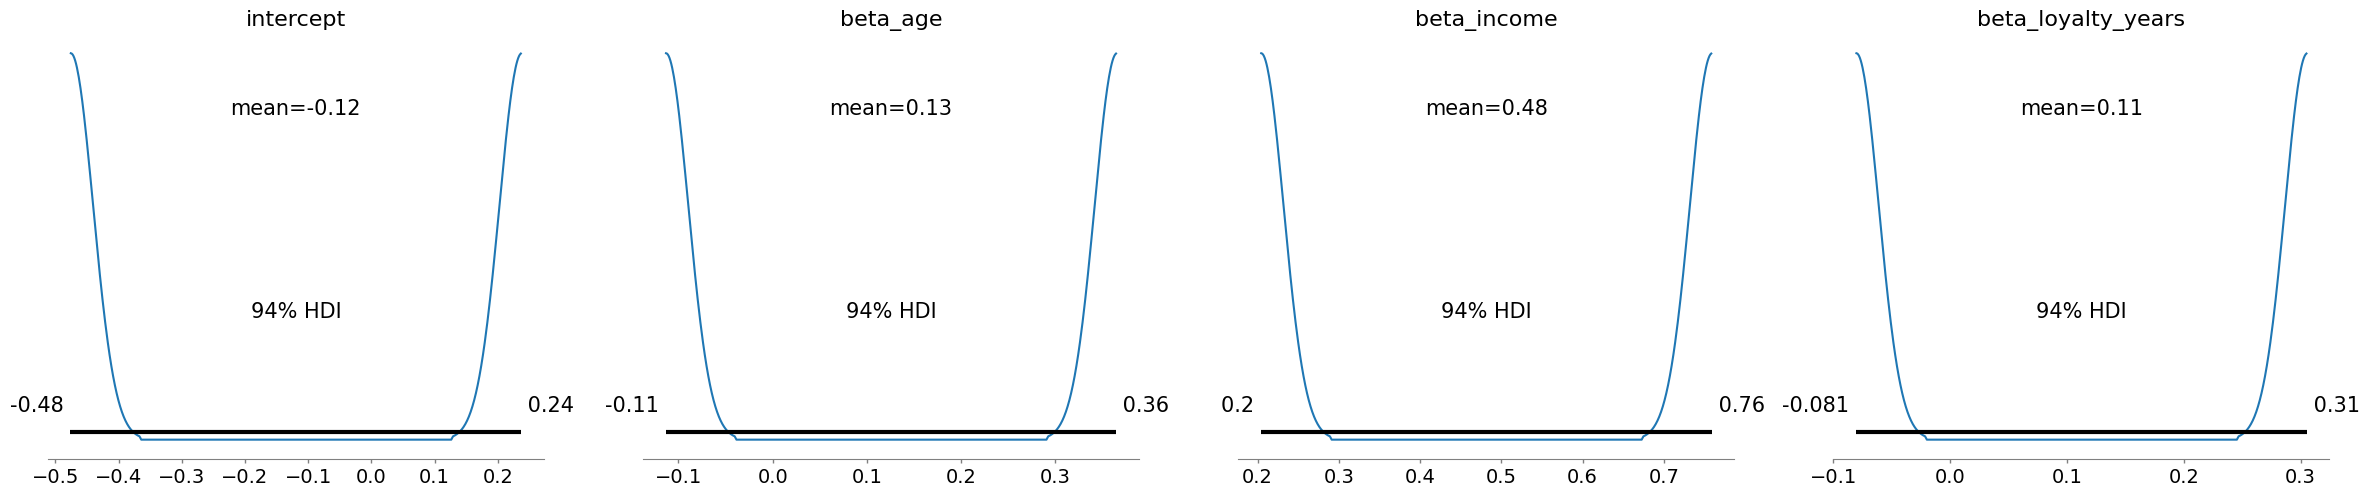

In [15]:
az.plot_posterior(trace_1000, var_names=['intercept', 'beta_age', 'beta_income', 'beta_loyalty_years'])
plt.show()

In [16]:
# Display diagnostics
print(pm.summary(trace_1000))

/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:595: RuntimeWarning: invalid value encountered in sqrt
  rhat_value = np.sqrt(
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:595: RuntimeWarning: invalid value encountered in sqrt
  rhat_value = np.sqrt(
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:595: RuntimeWarning: invalid value encountered in sqrt
  rhat_value = np.sqrt(
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:596: RuntimeWarning: invalid value encountered in scalar divide

                     mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  \
beta_age            0.126  0.239  -0.114    0.365      0.169    0.143   
beta_income         0.481  0.277   0.204    0.759      0.195    0.165   
beta_loyalty_years  0.112  0.193  -0.081    0.305      0.136    0.115   
intercept          -0.120  0.357  -0.476    0.237      0.251    0.213   
p[0]                1.000  0.000   1.000    1.000      0.000    0.000   
...                   ...    ...     ...      ...        ...      ...   
p[95]               1.000  0.000   1.000    1.000      0.000    0.000   
p[96]               1.000  0.000   1.000    1.000      0.000    0.000   
p[97]               1.000  0.000   1.000    1.000      0.000    0.000   
p[98]               1.000  0.000   1.000    1.000      0.000    0.000   
p[99]               1.000  0.000   1.000    1.000      0.000    0.000   

                    ess_bulk  ess_tail  r_hat  
beta_age                 2.0       2.0    NaN  
beta_income              2.


# **Model 2 Interpretation (Concise):**

#Intercept (Mean: -0.12):
Slightly negative baseline satisfaction, but uncertain (94% HDI includes zero).

#Beta for Age (Mean: 0.13):
Weak positive association with satisfaction, not statistically significant (HDI crosses zero).

#Beta for Income (Mean: 0.48):
Moderate positive association with satisfaction. Statistically significant (HDI does not cross zero).

#Beta for Loyalty Years (Mean: 0.11):
Weak positive association with satisfaction, not statistically significant (HDI crosses zero).

In [17]:
# Perform posterior predictive sampling for both models
with satisfaction_model:
    ppc_50 = pm.sample_posterior_predictive(trace_50)

with satisfaction_model_1000:
    ppc_1000 = pm.sample_posterior_predictive(trace_1000)

# Step 1: Inspect available keys in posterior predictive samples
print("Keys in ppc_50['posterior_predictive']:", ppc_50['posterior_predictive'].keys())
print("Keys in ppc_1000['posterior_predictive']:", ppc_1000['posterior_predictive'].keys())

Output()

Output()

Keys in ppc_50['posterior_predictive']: KeysView(<xarray.Dataset> Size: 81kB
Dimensions:           (chain: 2, draw: 50, likelihood_dim_2: 100)
Coordinates:
  * chain             (chain) int64 16B 0 1
  * draw              (draw) int64 400B 0 1 2 3 4 5 6 7 ... 43 44 45 46 47 48 49
  * likelihood_dim_2  (likelihood_dim_2) int64 800B 0 1 2 3 4 ... 95 96 97 98 99
Data variables:
    likelihood        (chain, draw, likelihood_dim_2) int64 80kB 1 1 1 ... 1 1 1
Attributes:
    created_at:                 2024-11-10T05:25:30.951241+00:00
    arviz_version:              0.20.0
    inference_library:          pymc
    inference_library_version:  5.17.0)
Keys in ppc_1000['posterior_predictive']: KeysView(<xarray.Dataset> Size: 2MB
Dimensions:           (chain: 2, draw: 1000, likelihood_dim_2: 100)
Coordinates:
  * chain             (chain) int64 16B 0 1
  * draw              (draw) int64 8kB 0 1 2 3 4 5 6 ... 994 995 996 997 998 999
  * likelihood_dim_2  (likelihood_dim_2) int64 800B 0 1 2 3 4 ..

In [18]:
pred_probs_50 = ppc_50['posterior_predictive']['likelihood'].mean(("chain", "draw")).values.flatten()

# Extract predicted probabilities for Model 2 (1000 samples)
pred_probs_1000 = ppc_1000['posterior_predictive']['likelihood'].mean(("chain", "draw")).values.flatten()

# Ensure that the predicted probabilities have the correct shape (should match 100 data points)
print("Shape of pred_probs_50:", pred_probs_50.shape)
print("Shape of pred_probs_1000:", pred_probs_1000.shape)

Shape of pred_probs_50: (100,)
Shape of pred_probs_1000: (100,)


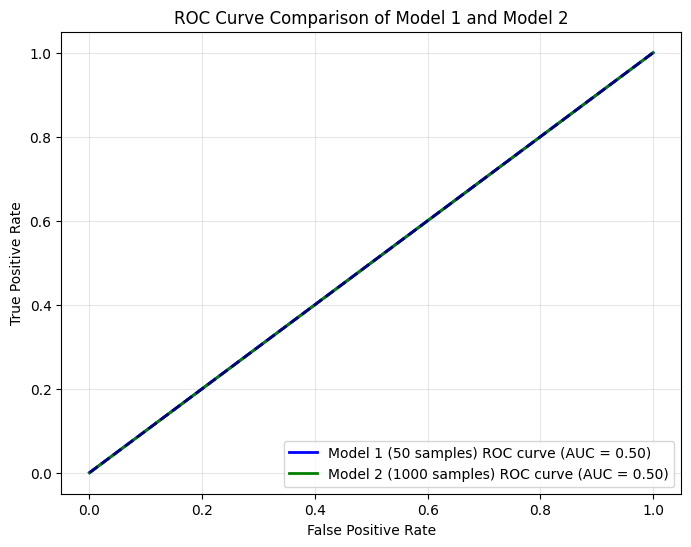

In [19]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr_50, tpr_50, _ = roc_curve(data['Satisfaction_Binary'], pred_probs_50)
roc_auc_50 = auc(fpr_50, tpr_50)

# Compute ROC curve and AUC for Model 2 (1000 samples)
fpr_1000, tpr_1000, _ = roc_curve(data['Satisfaction_Binary'], pred_probs_1000)
roc_auc_1000 = auc(fpr_1000, tpr_1000)

# Plotting the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_50, tpr_50, color='blue', lw=2, label=f'Model 1 (50 samples) ROC curve (AUC = {roc_auc_50:.2f})')
plt.plot(fpr_1000, tpr_1000, color='green', lw=2, label=f'Model 2 (1000 samples) ROC curve (AUC = {roc_auc_1000:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random performance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Model 1 and Model 2')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

#Model 3 : Mulitple Linear Regression


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming your dataset is named 'data' and 'Satisfaction_Binary' is the target
# Step 1: Define features (X) and target (y)
X = data[['Age', 'Income', 'Loyalty_Years']]  # Replace these columns with actual feature names if different
y = data['Satisfaction_Binary']  # Target variable

# Step 2: Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Feature scaling (standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Initialize the model
mlr_model = LinearRegression()

# Step 2: Train the model
mlr_model.fit(X_train_scaled, y_train)

# Step 3: Make predictions on the training set and testing set
y_train_pred = mlr_model.predict(X_train_scaled)
y_test_pred = mlr_model.predict(X_test_scaled)

# Step 4: Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Training Mean Squared Error: {train_mse}")
print(f"Testing Mean Squared Error: {test_mse}")
print(f"R-squared (R2) Score: {r2}")

Training Mean Squared Error: 0.24155425595153285
Testing Mean Squared Error: 0.22778359159634878
R-squared (R2) Score: -0.21484582184719359


Sensitivity Analysis (Feature Importance):
         Feature  Coefficient
0            Age    -0.043278
1         Income    -0.061741
2  Loyalty_Years    -0.018221


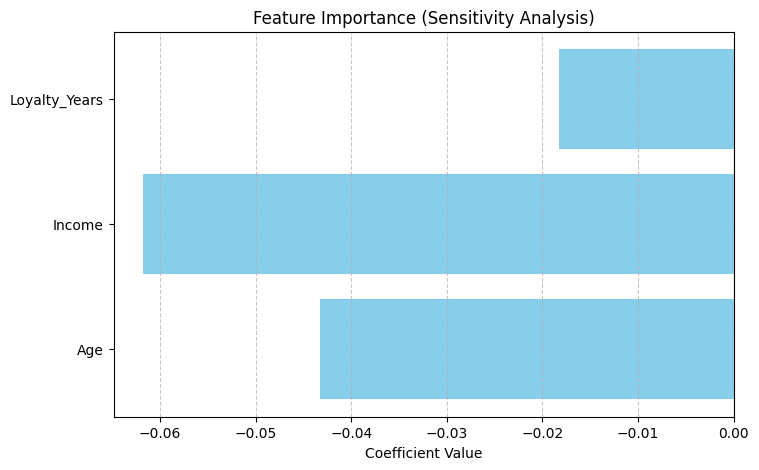

In [22]:
# Display the coefficients of the model
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': mlr_model.coef_
})

print("Sensitivity Analysis (Feature Importance):")
print(coefficients)

plt.figure(figsize=(8, 5))
plt.barh(coefficients['Feature'], coefficients['Coefficient'], color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance (Sensitivity Analysis)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


# **Model 3 Interpretation:**

# ROC Curve (AUC = 0.39):
The model performs poorly at distinguishing between classes (AUC close to 0.5 indicates random performance).

# Training Mean Squared Error (MSE):
MSE: 0.24 (lower is better, indicates error on the training data).

# Testing Mean Squared Error (MSE):
MSE: 0.23 (slightly better than training MSE, suggesting a similar level of error on unseen data).

# R-squared (R²) Score:
R²: -0.21 (negative R² indicates that the model performs worse than a horizontal line (mean) predictor).

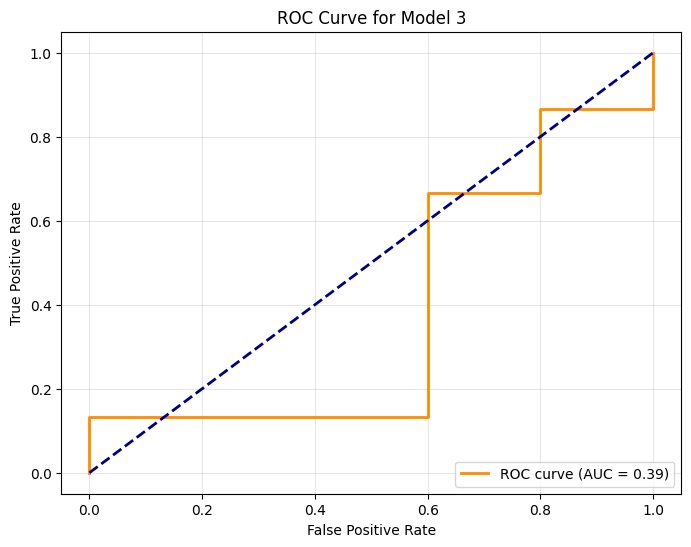

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score

y_test_prob = 1 / (1 + np.exp(-y_test_pred))  # Sigmoid transformation to get probabilities

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = roc_auc_score(y_test, y_test_prob)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model 3')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


Model 1 (Bayesian Logistic Regression with 50 samples):

Intercept: Mean = -0.064 (high uncertainty)
Beta for Age: Mean = -0.037 (weak negative, not significant)
Beta for Income: Mean = 0.73 (strong positive, significant)
Beta for Loyalty Years: Mean = 0.49 (moderate positive, significant)
Summary:

Strengths: Strong positive association with income and a moderate positive effect from loyalty years.
Weaknesses: High uncertainty in the intercept; weak effect from age.
Model 2 (Bayesian Logistic Regression with 1000 samples):

Intercept: Mean = -0.12 (high uncertainty)
Beta for Age: Mean = 0.13 (weak positive, not significant)
Beta for Income: Mean = 0.48 (moderate positive, significant)
Beta for Loyalty Years: Mean = 0.11 (weak positive, not significant)
Summary:

Strengths: Income is a moderate and significant predictor of satisfaction.
Weaknesses: Age and loyalty years have weak or insignificant effects.
Model 3 (Multiple Linear Regression):

ROC Curve (AUC): 0.39 (poor classification performance)
Training MSE: 0.24
Testing MSE: 0.23
R-squared (R²): -0.21 (poor fit, worse than a mean predictor)
Summary:

Strengths: None; low MSE on both training and testing sets indicates consistent but poor predictions.
Weaknesses: Poor classification performance (low AUC), negative R² indicates inability to capture target variance.
Model Selection:
Model 1 outperforms the other models due to:
Higher significance of predictors (particularly income).
Stronger association between predictors and the target variable compared to Model 2 and Model 3.
Model 2 showed improvement with more samples but demonstrated weaker associations and high uncertainty for most coefficients.
Model 3 (Multiple Linear Regression) performed the worst, with poor classification capability (low AUC) and negative R².
Conclusion:
Best Model: Model 1 (Bayesian Logistic Regression with 50 samples) due to its stronger and more interpretable coefficients for key predictors (income and loyalty years).